<img src="./images/Pandas_logo.png" alt="Python Pandas" width="800"/>

# Python Pandas
## Agenda
- What is Pandas?
- Selecting Column
- Series String Function
- Combining Columns
- Summary Statistics
- Grouped Statistics
- Filtering Data
- Plotting


## What is pandas?
pandas is a very popular and easy-to-learn Python library for handling tabular data. It can take in data from a wide range of sources such as CSV files, Excel files, HTML tables on the web, and text files. It allows you to apply the same framework to all of these sources to clean and analyze the data using optimized built-in functionality which scales very well with large datasets.

We begin by importing pandas, conventionally aliased as pd. We can then import a CSV file as a DataFrame using the **pd.read_csv()** function, which takes in the path of the file you want to import. To view the DataFrame in a Jupyter notebook, we simply type the name of the variable.

In [1]:
import pandas as pd
pd.__version__

'1.2.5'

In [2]:
# Download a sample file from http://insideairbnb.com/
# Here we use an unix command to directly import file from the web in the DeepNote.
! wget http://data.insideairbnb.com/canada/nb/new-brunswick/2022-06-24/visualisations/listings.csv -O ./data/airbnb.csv

--2022-09-23 21:29:53--  http://data.insideairbnb.com/canada/nb/new-brunswick/2022-06-24/visualisations/listings.csv
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.231.199.77
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.231.199.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449943 (439K) [application/csv]
Saving to: ‘./data/airbnb.csv’

./data/airbnb.csv   100%[===================>] 439.40K  --.-KB/s    in 0.01s   

2022-09-23 21:29:53 (35.8 MB/s) - ‘./data/airbnb.csv’ saved [449943/449943]



In [3]:
# read the airbnb NB listings csv file
airbnb = pd.read_csv("./data/airbnb.csv")

In [4]:
# display the pandas DataFrame
display(airbnb.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29150746,Waterfront privacy - Cozy vacation home,219658423,Tim,Kent,Wellington,46.43848,-64.70642,Entire home/apt,250,3,19,2021-08-16,0.52,1,19,5,NaN
1,46150140,Cozy camp 2,373410986,Daniel & Randalyn,Madawaska,Saint-Francois,47.21967,-68.65194,Private room,104,1,8,2022-05-14,0.40,4,293,5,NaN
2,36698598,BaieSteAnneCottage.Minimum 7 nights summer month,48721268,Colin,Northumberland,Hardwicke,47.03242,-65.01803,Entire home/apt,175,2,6,2022-06-02,0.24,1,296,3,NaN
3,552500,Maine Riverfront Bed and Breakfast ROOM 3,2714886,Karen,Charlotte,Dufferin,45.16902,-67.24404,Private room,175,1,61,2021-10-14,0.51,4,114,5,NaN
4,7797124,Best Cottage on the Bay of Fundy,41039968,Julie,Albert,Harvey,45.63206,-64.85833,Entire home/apt,200,2,125,2022-06-22,1.71,1,30,19,NaN


Since there are so many rows in the DataFrame, we see that most of the data is truncated. We can view just the first or last few entries in the DataFrame using the **.head() and .tail()** methods.

In [5]:
# View last few entries
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2960,5418416,Bay of Fundy Winterized Cottage,28090100,Vince,Charlotte,Pennfield,45.11581,-66.58463,Entire home/apt,123,3,61,2022-05-15,0.72,1,75,8,NaN
2961,610019261928093921,Chalet tout confort avec magnifique vue sur la...,80311990,Nathalie,Westmorland,Botsford,46.23122,-64.24562,Entire home/apt,335,7,0,NaN,NaN,1,205,0,NaN
2962,54220114,Bright and Cheerful Coastal Cottage,4494946,Marie,Kent,Wellington,46.54814,-64.70881,Entire home/apt,161,3,0,NaN,NaN,2,98,0,NaN
2963,50240177,Waterfront 2-bedroom! Paradise at your fingert...,110874410,Janick,Kent,Richibucto,46.69200,-64.85783,Entire home/apt,250,3,8,2022-04-05,0.70,1,313,8,NaN
2964,5684585,Oceanfront Rancher- Spectacular Views,12620928,Barbara,Charlotte,Lepreau,45.12055,-66.47492,Entire home/apt,160,4,10,2021-10-26,0.14,1,214,4,NaN



## Selecting Column
Typically, we will only want a subset of the available columns in our DataFrame. We can select a single column using single brackets and the name of the column as shown below. 

In [6]:
# Results for a single column
airbnb['name']

0                 Waterfront privacy - Cozy vacation home
1                                             Cozy camp 2
2        BaieSteAnneCottage.Minimum 7 nights summer month
3               Maine Riverfront Bed and Breakfast ROOM 3
4                        Best Cottage on the Bay of Fundy
                              ...                        
2960                      Bay of Fundy Winterized Cottage
2961    Chalet tout confort avec magnifique vue sur la...
2962                  Bright and Cheerful Coastal Cottage
2963    Waterfront 2-bedroom! Paradise at your fingert...
2964                Oceanfront Rancher- Spectacular Views
Name: name, Length: 2965, dtype: object

In [7]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

To select multiple columns at once, we use double brackets and commas between column names as shown below.

The result is a new DataFrame object with the selected columns. It is useful to select the columns you are interested in analyzing before moving onto the analysis, especially if the data is wide with many unnecessary variables.

In [8]:
# results for multiple columns
hosts = airbnb[['host_id', 'host_name']]
hosts.head()

,host_id,host_name
0,219658423,Tim
1,373410986,Daniel & Randalyn
2,48721268,Colin
3,2714886,Karen
4,41039968,Julie


To check the data types of columns we call the **.dtypes** attribute of the DataFrame. To convert a column to a datetime index, we use the **.to_datetime()** functions (these functions exist for all supported data types like **.to_string()** to convert a column to be stored as a string).

In the code below, we also see the syntax to both edit existing columns and create new ones. Specifically, we want to convert the **last_review** column to a datetime column. So we select it as seen in the previous section and set it equal to the result of the operation. Datetime series have a **.dt** attribute with built-in attributes and functions. Below, we select the **.year** attribute of the newly typed datetime column, **last_review**, to get the year of each row.



In [9]:
# Show the data types for each column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [10]:
# Change the type of a column to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

In [11]:
# extract the year from a datetime series
airbnb['year'] = airbnb['last_review'].dt.year
airbnb['year'].head()

0    2021.0
1    2022.0
2    2022.0
3    2021.0
4    2022.0
Name: year, dtype: float64

## Derived Columns

One useful data cleaning/preparation technique we will cover is combining rows. If we want to make calculations between columns, we can easily do this by applying the operation to each of the series as shown below. Here, we are calculating the minimum number of revenue a listing generates, by calculating the product of the minimum number of stays and the price per night.



In [12]:
# calculate using two columns
airbnb['min_revenue'] = airbnb['minimum_nights'] * airbnb['price']
airbnb[['minimum_nights', 'price', 'min_revenue']].head()

,minimum_nights,price,min_revenue
0,3,250,750
1,1,104,104
2,2,175,350
3,1,175,175
4,2,200,400


## Summary Statistics
Once the data is clean and ready to analyze, we can compute some interesting statistics to answer some business questions. The first question we may have is what the average and median price is for the listings in our data. We use the built-in **.mean()** and **.median()** methods to compute these.


In [13]:
# get the mean price
round(airbnb['price'].mean(), 2)

184.91

In [14]:
# get the median price
airbnb['price'].median()

143.0

In [15]:
round(airbnb['price'].std(), 2)

943.77

In [16]:
round(airbnb['price'].var(), 2)

890704.25

## Filtering Data

Often, we are only interested in a subset of the rows in our dataset. For example, we may only be interested in listings under $1000 as they are more common and closer to the typical listing. We do this by passing a Boolean expression into single brackets as shown below.

In [17]:
# get all rows with price < 1000
airbnb_under_1000 = airbnb[airbnb['price'] < 1000]
airbnb_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,min_revenue
0,29150746,Waterfront privacy - Cozy vacation home,219658423,Tim,Kent,Wellington,46.43848,-64.70642,Entire home/apt,250,3,19,2021-08-16,0.52,1,19,5,NaN,2021.0,750
1,46150140,Cozy camp 2,373410986,Daniel & Randalyn,Madawaska,Saint-Francois,47.21967,-68.65194,Private room,104,1,8,2022-05-14,0.40,4,293,5,NaN,2022.0,104
2,36698598,BaieSteAnneCottage.Minimum 7 nights summer month,48721268,Colin,Northumberland,Hardwicke,47.03242,-65.01803,Entire home/apt,175,2,6,2022-06-02,0.24,1,296,3,NaN,2022.0,350
3,552500,Maine Riverfront Bed and Breakfast ROOM 3,2714886,Karen,Charlotte,Dufferin,45.16902,-67.24404,Private room,175,1,61,2021-10-14,0.51,4,114,5,NaN,2021.0,175
4,7797124,Best Cottage on the Bay of Fundy,41039968,Julie,Albert,Harvey,45.63206,-64.85833,Entire home/apt,200,2,125,2022-06-22,1.71,1,30,19,NaN,2022.0,400


We can also pass in multiple filters by surrounding each expression in parenthesis and using either **&** (for and expressions) or **|** (for or expressions). You will get an error if you do not surround the expressions with parentheses.

In [18]:
# get all rows with price < 1000 and year equal to 2020
airbnb_2020_under_1000 = airbnb[(airbnb['price'] < 1000) & (airbnb['year'] == 2020)]
airbnb_2020_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,min_revenue
31,10549820,Gite - Le Ch'ti Gite Bathurst,3200436,Christophe,Gloucester,Beresford,47.76642,-65.71670,Entire home/apt,85,1,56,2020-01-19,0.78,1,174,0,NaN,2020.0,85
35,11165175,Grand Lake Private Beachfront,58075626,Corey,Queens,Waterborough,45.96655,-65.99916,Entire home/apt,150,3,47,2020-07-31,0.64,1,21,0,NaN,2020.0,450
38,145013,Lobster Lane Cottage: private beach,642972,Jennifer,Kent,Dundas,46.32857,-64.52445,Entire home/apt,150,7,8,2020-08-23,0.08,1,286,0,NaN,2020.0,1050
47,954893,Cozy Room in 3 Bedroom Home,2615407,Patti,Kings,Rothesay,45.35355,-66.02920,Private room,65,2,40,2020-08-18,0.41,1,124,0,NaN,2020.0,130
87,2535589,Old Launch Ways - Family Cottage,4602006,Alec,Kings,Kingston,45.44755,-66.00487,Entire home/apt,150,7,44,2020-08-08,0.45,1,296,0,NaN,2020.0,1050


## Grouped Statistics
We can also conduct these calculations on groupings of data using the **.groupby()** method. This function is very similar to using **pivot tables** in excel as we select a subset of columns in our data and then conduct aggregate calculations on them. As we mentioned in the introduction of this case study, we are interested in the difference in prices between each type of room listing in our data.


### Groupby

In [19]:
# get the mean grouped by type of room
airbnb[['room_type', 'price']].groupby('room_type', as_index=False).mean().round(2)

,room_type,price
0,Entire home/apt,204.36
1,Hotel room,127.25
2,Private room,113.96
3,Shared room,55.50


In [20]:
airbnb.room_type.value_counts()

Entire home/apt    2329
Private room        628
Shared room           4
Hotel room            4
Name: room_type, dtype: int64

In [21]:
airbnb_grouped = airbnb.groupby("room_type")
len(airbnb_grouped)

4

In [22]:
for i in ['Entire home/apt', 'Private room', 'Shared room', "Hotel room"]:
    print(airbnb_grouped.get_group(i).shape)

(2329, 20)
(628, 20)
(4, 20)
(4, 20)


In [23]:
#airbnb_grouped
#.apply(lambda x: x[['host_name', 'price', 'room_type']]
#.sort_values(by = 'price', ascending = False)
#.iloc[:3,:])
airbnb_grouped.apply(lambda x: x[['host_name', 'price', 'room_type']].sort_values(by = 'price', ascending = False).iloc[:3,:])

host_name  price        room_type
room_type                                                        
Entire home/apt 1146                 Rene  51000  Entire home/apt
                1223            Francesca   3500  Entire home/apt
                1559                 Brad   2500  Entire home/apt
Hotel room      222                 Cindy    170       Hotel room
                435                 Denis    143       Hotel room
                863             Charanjit    117       Hotel room
Private room    1564                  Tom   2057     Private room
                158   Sébastien & Heather    999     Private room
                156   Sébastien & Heather    999     Private room
Shared room     932                Maggie    125      Shared room
                2537                   Ed     37      Shared room
                2533                   Ed     30      Shared room

In [24]:
airbnb.groupby('room_type').apply(lambda x: x['price'].describe()).round(2)

price,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,2329.0,204.36,1062.09,13.0,116.0,154.0,212.00,51000.0
Hotel room,4.0,127.25,38.77,79.0,107.5,130.0,149.75,170.0
Private room,628.0,113.96,125.22,16.0,59.0,95.0,136.00,2057.0
Shared room,4.0,55.50,46.45,30.0,30.0,33.5,59.00,125.0


In [25]:
airbnb.groupby('room_type')['price'].mean()

room_type
Entire home/apt    204.361099
Hotel room         127.250000
Private room       113.964968
Shared room         55.500000
Name: price, dtype: float64

In [26]:
airbnb.groupby(['room_type', 'neighbourhood'])['price'].mean()

room_type        neighbourhood     
Entire home/apt  Aberdeen              100.000000
                 Addington             160.722222
                 Alma                  192.825000
                 Alnwick               146.076923
                 Andover               122.000000
                                          ...    
Private room     Wicklow               110.000000
                 Wilmot                110.000000
                 Woodstock              73.750000
Shared room      Bathurst              125.000000
                 City of Saint John     32.333333
Name: price, Length: 216, dtype: float64

In [27]:
airbnb.groupby(['room_type', 'neighbourhood'])['price'].mean().unstack()

neighbourhood,Aberdeen,Addington,Alma,Alnwick,Andover,Bathurst,Beresford,Blackville,Blissfield,Blissville,...,Waterford,Weldford,Wellington,West Isles,Westfield,Westmorland,Wickham,Wicklow,Wilmot,Woodstock
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,100.0,160.722222,192.825,146.076923,122.000000,163.688889,168.6,250.95,166.8,40.0,...,195.071429,321.0,161.000000,241.000000,180.523810,133.000000,142.625,152.8,128.5,91.00
Hotel room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.00
Private room,100.0,40.000000,140.500,99.750000,156.666667,157.666667,620.0,NaN,NaN,NaN,...,99.000000,87.5,131.454545,104.666667,86.666667,112.666667,NaN,110.0,110.0,73.75
Shared room,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pivot Table

In [28]:
# pd.pivot_table(data = airbnb1, 
#                index = 'room_type', 
#                values = 'price', 
#                aggfunc = 'mean')
pd.pivot_table(data = airbnb, 
                index = 'room_type', 
                values = 'price', 
                aggfunc = 'mean').round(2)

,price
room_type,
Entire home/apt,204.36
Hotel room,127.25
Private room,113.96
Shared room,55.50


In [29]:
pd.pivot_table(data = airbnb, 
                index = 'room_type', 
                columns = 'neighbourhood',
                values = 'price', 
                aggfunc = 'mean').round(2)

neighbourhood,Aberdeen,Addington,Alma,Alnwick,Andover,Bathurst,Beresford,Blackville,Blissfield,Blissville,...,Waterford,Weldford,Wellington,West Isles,Westfield,Westmorland,Wickham,Wicklow,Wilmot,Woodstock
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,100.0,160.72,192.82,146.08,122.00,163.69,168.6,250.95,166.8,40.0,...,195.07,321.0,161.00,241.00,180.52,133.00,142.62,152.8,128.5,91.00
Hotel room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.00
Private room,100.0,40.00,140.50,99.75,156.67,157.67,620.0,NaN,NaN,NaN,...,99.00,87.5,131.45,104.67,86.67,112.67,NaN,110.0,110.0,73.75
Shared room,NaN,NaN,NaN,NaN,NaN,125.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Group_by Vs Pivot Table

In [30]:
%timeit airbnb.groupby('room_type')['price'].mean()

626 µs ± 8.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%timeit pd.pivot_table(data = airbnb, index= 'room_type', values='price', aggfunc='mean')

3.56 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit airbnb.groupby(['room_type', 'neighbourhood'])['price'].mean().unstack()

1.76 ms ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%timeit pd.pivot_table(data=airbnb, index='room_type', columns='neighbourhood', values='price', aggfunc='mean')

5.97 ms ± 53.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Additional Exercises

## Plotting
pandas also has built-in plotting capabilities. For example, we can see the distribution of prices for each listing in our dataset using a histogram in one line of code. Note, we use the under $1000 DataFrame here as we cannot see the bars very clearly when including all prices.

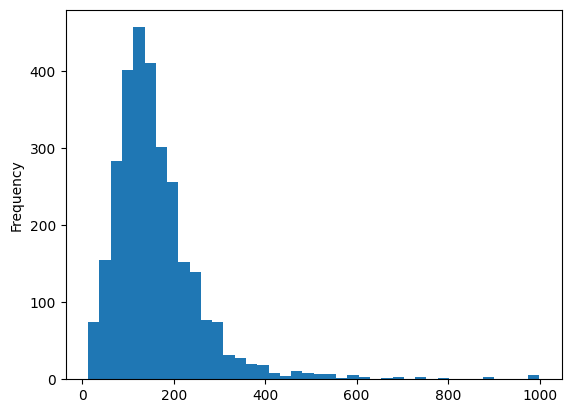

In [34]:
# distribution of prices under $1000
ax = airbnb_under_1000['price'].plot.hist(bins=40)

## Series String Functions

Series is the primary building block of pandas. It represents a one-dimensional labeled Numpy array. Another useful data cleaning tool is removing leading and trailing whitespace from string data. This can be done using the strip method.

In [35]:
# Strip leading and trailing spaces from a string series
airbnb['name'] = airbnb['name'].str.strip()
airbnb['name'].tail()

2960                      Bay of Fundy Winterized Cottage
2961    Chalet tout confort avec magnifique vue sur la...
2962                  Bright and Cheerful Coastal Cottage
2963    Waterfront 2-bedroom! Paradise at your fingert...
2964                Oceanfront Rancher- Spectacular Views
Name: name, dtype: object

In [36]:
# uppercase all strings in a series
airbnb['name_upper'] = airbnb['name'].str.upper()
airbnb['name_upper'].tail()

2960                      BAY OF FUNDY WINTERIZED COTTAGE
2961    CHALET TOUT CONFORT AVEC MAGNIFIQUE VUE SUR LA...
2962                  BRIGHT AND CHEERFUL COASTAL COTTAGE
2963    WATERFRONT 2-BEDROOM! PARADISE AT YOUR FINGERT...
2964                OCEANFRONT RANCHER- SPECTACULAR VIEWS
Name: name_upper, dtype: object

In [37]:
# lowercase all strings in a series
airbnb['name_lower'] = airbnb['name'].str.lower()
airbnb['name_lower'].tail()

2960                      bay of fundy winterized cottage
2961    chalet tout confort avec magnifique vue sur la...
2962                  bright and cheerful coastal cottage
2963    waterfront 2-bedroom! paradise at your fingert...
2964                oceanfront rancher- spectacular views
Name: name_lower, dtype: object

In [38]:
import numpy as np

In [39]:
pd.Series([1,3,5,6])

0    1
1    3
2    5
3    6
dtype: int64

In [40]:
pd.Series([1,3,5,6], index=['A1','A2','A3','A4'])

A1    1
A2    3
A3    5
A4    6
dtype: int64

In [41]:
a = {'A': 5, 'B': 7}
s = pd.Series(a)
s

A    5
B    7
dtype: int64

In [42]:
a = np.random.randn(100)*5+100
date = pd.date_range('20220101',periods=100)
s = pd.Series(a,index=date)
s

2022-01-01     99.045456
2022-01-02     96.354875
2022-01-03    105.041351
2022-01-04    100.193922
2022-01-05    110.021731
                 ...    
2022-04-06    103.114279
2022-04-07    102.847781
2022-04-08     89.913052
2022-04-09    105.695506
2022-04-10    101.401331
Freq: D, Length: 100, dtype: float64

In [43]:
a = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']) 
b = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a']) 
a + b # different from Python list 

a    2
b    4
c    6
d    8
dtype: int64

In [44]:
a - b

a    0
b    0
c    0
d    0
dtype: int64

In [45]:
a * b

a     1
b     4
c     9
d    16
dtype: int64

In [46]:
a / b

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

## Series Attributes
s.index             : show the indexes
s.values           : show the values
len(s)               : number of elements
s.head()          : first 5 rows
s.head(10)      : first 10 rows
s.tail()		: last 5 rows
s.tail(10)		: last 10 rows

Select Series Elements
s['b']			: by named label
s[2]				: by integer index
s[['b','d']]		: multiple select by label
s[[1,3]]			: multiple select by index integer
s[3:8]			: slice items 3 to 8


In [47]:
date = pd.date_range('20220101',periods=20)
s = pd.Series(np.random.randn(20),index=date)


# Slice out the data from 2022-01-05 to 2022-01-10?



## Creating Data Frame

In [48]:
d = [[1,2],[3,4]]

df = pd.DataFrame(d,index=['r1','r2'],columns=['a','b'])
df


,a,b
r1,1,2
r2,3,4


In [49]:
import numpy as np
d = np.arange(24).reshape(6,4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [50]:
df = pd.DataFrame(d, index=np.arange(1,7), columns=list('ABCD'))
df

,A,B,C,D
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19
6,20,21,22,23


In [51]:
pd.DataFrame(
	{
	'name': ['Ally','Jane','Belinda'],
	'height':[160,155,163],
	},
    columns = ['name','height'],
	index = ['A1','A2','A3']
	)


,name,height
A1,Ally,160
A2,Jane,155
A3,Belinda,163


In [52]:
date = pd.date_range('20170101',periods=6)
s1 = pd.Series(np.random.randn(6).round(4),index=date)
s2 = pd.Series(np.random.randn(6).round(4),index=date)
df = pd.DataFrame({'Asia':s1,'Europe':s2})
df

,Asia,Europe
2017-01-01,-1.1321,-2.2266
2017-01-02,-1.0815,0.1838
2017-01-03,-2.2459,0.7463
2017-01-04,0.6785,0.8351
2017-01-05,1.9771,-0.6767
2017-01-06,1.0861,-1.3591


df.shape		: Dimensionality of a DF
df.columns	: columns of a DF
df.index		: index of a DF
df.values		: values of a DF


In [53]:
a = [[3,4],[5,6]]
b = [[6,5],[4,3]]
a2 = pd.DataFrame(a,index=[1,2],columns=['d','b'])
a2

,d,b
1,3,4
2,5,6


In [54]:
b2 = pd.DataFrame(b,index=[3,2],columns=['c','b'])
b2

,c,b
3,6,5
2,4,3


In [55]:
print(a2 + b2)

     b   c   d
1  NaN NaN NaN
2  9.0 NaN NaN
3  NaN NaN NaN


In [56]:
from pandas import DataFrame
import numpy as np
import os

In [57]:
from pandas import DataFrame
my_df = DataFrame(data = np.random.randn(16).round(2).reshape(4,4),
                  index = ['r'+str(i) for i in range(1, 5)],
                  columns = ['c'+str(i) for i in range(1, 5)])

In [58]:
my_df

,c1,c2,c3,c4
r1,-0.59,-1.68,-0.67,0.65
r2,1.11,1.41,0.32,0.16
r3,-0.97,-1.50,0.45,-0.82
r4,0.34,-0.83,-0.55,-2.03


In [59]:
my_df.T

,r1,r2,r3,r4
c1,-0.59,1.11,-0.97,0.34
c2,-1.68,1.41,-1.50,-0.83
c3,-0.67,0.32,0.45,-0.55
c4,0.65,0.16,-0.82,-2.03


## Dataframe Elements

In [60]:
my_df.loc[['r1', 'r4'], ['c3', 'c4']]

,c3,c4
r1,-0.67,0.65
r4,-0.55,-2.03


In [61]:
my_df.iloc[[0, 3], [2, 3]]

,c3,c4
r1,-0.67,0.65
r4,-0.55,-2.03


## Magic Commands

In [62]:
# Get a glimpse of the data file before importing it in a dataframe.
!head -5 listings.csv

head: cannot open 'listings.csv' for reading: No such file or directory


In [63]:
%ls

data/  images/


In [64]:
[x for x in os.listdir(os.getcwd()) if 'csv' in x]

[]

In [65]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [66]:
%ls

data/  images/


In [67]:
airbnb.to_csv('./data/listings.csv')

In [68]:
os.listdir(os.getcwd() + '/data')

['listings.csv', 'airbnb.csv']

## Statistical Summary

In [69]:
%cd data

/work/data


In [70]:
airbnb1 = pd.read_csv('listings.csv')

In [71]:
airbnb1.sum(axis = 0)

Unnamed: 0                                                                  4394130
id                                                             -3610878714205223290
name                              Waterfront privacy - Cozy vacation homeCozy ca...
host_id                                                                573666540947
host_name                         TimDaniel & RandalynColinKarenJulieKarenMauric...
neighbourhood_group               KentMadawaskaNorthumberlandCharlotteAlbertChar...
neighbourhood                     WellingtonSaint-FrancoisHardwickeDufferinHarve...
latitude                                                              136828.535193
longitude                                                            -194650.126753
room_type                         Entire home/aptPrivate roomEntire home/aptPriv...
price                                                                        548258
minimum_nights                                                              

In [72]:
airbnb1.sum(axis = 1)

0       2.488122e+08
1       4.195636e+08
2       8.542271e+07
3       3.269923e+06
4       4.883988e+07
            ...     
2960    3.351412e+07
2961    6.100193e+17
2962    5.871875e+07
2963    1.611209e+08
2964    1.831151e+07
Length: 2965, dtype: float64

## Math Operations

In [73]:
airbnb1.fillna(0).describe().round(1)

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,min_revenue
count,2965.0,2.965000e+03,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0,2965.0
mean,1482.0,1.232121e+17,193479440.5,46.1,-65.6,184.9,2.8,27.0,1.2,4.5,193.7,10.9,1662.3,1026.6
std,856.1,2.451204e+17,136614545.4,0.8,1.1,943.8,7.8,46.9,1.6,8.7,121.0,17.1,773.0,28127.6
min,0.0,7.506500e+04,29209.0,44.6,-68.8,13.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
25%,741.0,3.187254e+07,73546473.0,45.6,-66.6,100.0,1.0,2.0,0.2,1.0,83.0,0.0,2021.0,130.0
50%,1482.0,4.623696e+07,176331934.0,46.1,-65.5,143.0,2.0,10.0,0.7,2.0,204.0,4.0,2022.0,266.0
75%,2223.0,5.330946e+07,288088082.0,46.4,-64.7,199.0,3.0,31.0,1.6,4.0,307.0,14.0,2022.0,555.0
max,2964.0,6.557973e+17,465607994.0,48.1,-63.8,51000.0,365.0,501.0,14.3,56.0,365.0,192.0,2022.0,1530000.0


In [74]:
airbnb1.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,min_revenue,name_upper,name_lower
0,0,29150746,Waterfront privacy - Cozy vacation home,219658423,Tim,Kent,Wellington,46.43848,-64.70642,Entire home/apt,...,2021-08-16,0.52,1,19,5,NaN,2021.0,750,WATERFRONT PRIVACY - COZY VACATION HOME,waterfront privacy - cozy vacation home
1,1,46150140,Cozy camp 2,373410986,Daniel & Randalyn,Madawaska,Saint-Francois,47.21967,-68.65194,Private room,...,2022-05-14,0.40,4,293,5,NaN,2022.0,104,COZY CAMP 2,cozy camp 2
2,2,36698598,BaieSteAnneCottage.Minimum 7 nights summer month,48721268,Colin,Northumberland,Hardwicke,47.03242,-65.01803,Entire home/apt,...,2022-06-02,0.24,1,296,3,NaN,2022.0,350,BAIESTEANNECOTTAGE.MINIMUM 7 NIGHTS SUMMER MONTH,baiesteannecottage.minimum 7 nights summer month
3,3,552500,Maine Riverfront Bed and Breakfast ROOM 3,2714886,Karen,Charlotte,Dufferin,45.16902,-67.24404,Private room,...,2021-10-14,0.51,4,114,5,NaN,2021.0,175,MAINE RIVERFRONT BED AND BREAKFAST ROOM 3,maine riverfront bed and breakfast room 3
4,4,7797124,Best Cottage on the Bay of Fundy,41039968,Julie,Albert,Harvey,45.63206,-64.85833,Entire home/apt,...,2022-06-22,1.71,1,30,19,NaN,2022.0,400,BEST COTTAGE ON THE BAY OF FUNDY,best cottage on the bay of fundy


In [75]:
airbnb1.set_index('id', inplace=True)

In [76]:
airbnb1.head()

,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,min_revenue,name_upper,name_lower
id,,,,,,,,,,,,,,,,,,,,,
29150746,0,Waterfront privacy - Cozy vacation home,219658423,Tim,Kent,Wellington,46.43848,-64.70642,Entire home/apt,250,...,2021-08-16,0.52,1,19,5,NaN,2021.0,750,WATERFRONT PRIVACY - COZY VACATION HOME,waterfront privacy - cozy vacation home
46150140,1,Cozy camp 2,373410986,Daniel & Randalyn,Madawaska,Saint-Francois,47.21967,-68.65194,Private room,104,...,2022-05-14,0.40,4,293,5,NaN,2022.0,104,COZY CAMP 2,cozy camp 2
36698598,2,BaieSteAnneCottage.Minimum 7 nights summer month,48721268,Colin,Northumberland,Hardwicke,47.03242,-65.01803,Entire home/apt,175,...,2022-06-02,0.24,1,296,3,NaN,2022.0,350,BAIESTEANNECOTTAGE.MINIMUM 7 NIGHTS SUMMER MONTH,baiesteannecottage.minimum 7 nights summer month
552500,3,Maine Riverfront Bed and Breakfast ROOM 3,2714886,Karen,Charlotte,Dufferin,45.16902,-67.24404,Private room,175,...,2021-10-14,0.51,4,114,5,NaN,2021.0,175,MAINE RIVERFRONT BED AND BREAKFAST ROOM 3,maine riverfront bed and breakfast room 3
7797124,4,Best Cottage on the Bay of Fundy,41039968,Julie,Albert,Harvey,45.63206,-64.85833,Entire home/apt,200,...,2022-06-22,1.71,1,30,19,NaN,2022.0,400,BEST COTTAGE ON THE BAY OF FUNDY,best cottage on the bay of fundy


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0396bd3d-5050-4c7c-9066-8077dbb9bdc2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>